In [ ]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io


In [ ]:
'''
 Function that returns risk calculated per sample
 y_output - output data
 y_pred - predicted value of otuput
 samples_count - number of samples input
'''
def risk_calulate(y_output, y_pred, samples_count):
  output = np.multiply(-y_output, y_pred)
  y_pred = [[1] if x > 0 else [-1] for x in output]
  risk_calculated = np.sum(y_pred)
  return risk_calculated/samples_count

In [ ]:
'''
 Function that returns error calculated per sample
 y_output - output data
 y_pred - predicted value of otuput
 samples_count - number of samples input
'''
def error_calculate(y_output, y_pred, samples_count):
  count = 0
  y_pred = [[1] if predicted_value[0] > 0 else [-1] for predicted_value 
            in y_pred]
  for i in range(samples_count):
    if y_pred[i][0] != y_output[i][0]:
      count+= 1
  return count/samples_count

In [ ]:
'''
 Function that plots the model 
 x_input - input from the data
 theta - calculated from logistic reg.
'''
def plot_model(x_input, theta):

  samples_num = x_input.shape[0]
  for i in range(samples_num):
      plt.plot(x_input[i, 0], x_input[i, 1], 'g.')
  min_x = min(x_input[:, 0])
  max_x = max(x_input[:, 0])
  y_min_x = float(-theta[2] - theta[0] * min_x) / theta[1]
  y_max_x = float(-theta[2] - theta[0] * max_x) / theta[1]
  plt.plot([min_x, max_x], [y_min_x, y_max_x], '-b')
  plt.xlabel('X0'); plt.ylabel('X1')
  plt.grid()
  plt.show()


In [ ]:
'''
 Function that plots the error-risk graph 
 error_list - contains the erros in a list
 risk_list - contains the risks in a list
 iterations_count - number of iterations
'''
def plot_error_risk_graph(error_list, risk_list, iterations_count):
  print("Total Iterations taken : {0}".format(iterations_count))
  x = range(iterations_count)
  plt.plot(x, error_list,'-',label='Error')
  plt.plot(x, risk_list, 'c-',label='Risk')
  plt.xlabel('Iterations Count')
  plt.ylabel('Error or Risk')
  plt.title('Error Risk Iterations Plot')
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
'''
 Function that performs logistic regression and plots model and error_graph
 x_input - input from the data
 y_output - output data
 step_size - step size value
'''
def linear_perceptron(x_input=np.empty(0), y_output=np.empty(0), 
                      step_size=1):
  # Returning both test and train error as zero if anyone of the parameters 
  # is missing
  if len(x_input) == 0 or len(y_output) == 0:
    print('Input/Output data or step_size tolerance combination missing')
    return 0,0

  # Setting values as per parameters
  samples_count = x_input.shape[0]
  features_count = x_input.shape[1]

  # Setting initial theta values to random values,count to zero and 
  # theta_new and theta_prev norm to a large number
  theta = np.random.rand(features_count, 1)
  iterations_count = 0
  

  error_list,risk_list = [],[]
  converged = False
  
  # Running the loop while convergence is not done
  while not converged:
    # Setting counter to a random value so that a random misclassfied input 
    # is picked
    counter = np.random.randint(samples_count)
    # Generating predicted value for the sample
    output = x_input[counter].reshape((1,3)).dot(theta)
    predicted_value = 1 if np.multiply(y_output[counter],output) > 0 else -1
    # Changing theta value for misclassied sample
    if predicted_value == -1:
      theta += step_size * x_input[counter].reshape((3, 1)).dot(
          y_output[counter].reshape((1,1)))
      #Calculating y_predicted
      y_pred = x_input.dot(theta)
      # Calculating mean classification error
      error_cal = error_calculate(y_output, y_pred, samples_count)
      error_list.append(error_cal)
      # Calculating risk
      risk_cal = risk_calulate(y_output, y_pred, samples_count)
      risk_list.append(risk_cal)
      # Increasing iteration count for misclassified sample
      iterations_count += 1
      if error_list[-1] == 0:
        converged = True
   
  #Plot model and error_graph
  plot_model(x_input, theta)
  plot_error_risk_graph(error_list, risk_list, iterations_count)
  


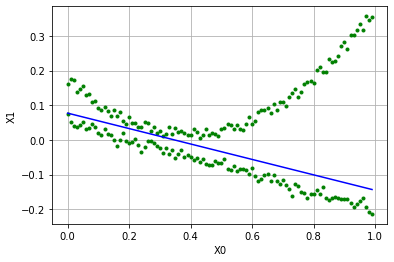

Total Iterations taken : 713


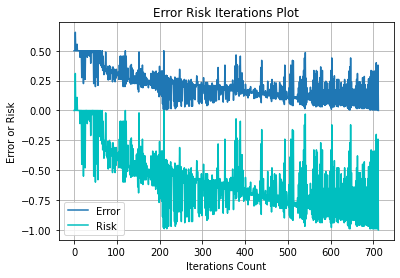

In [ ]:
# Loading .mat file
matlab_data = scipy.io.loadmat('data3.mat')
x_input = matlab_data['data'][:,:-1]
y_output = matlab_data['data'][:,-1]
ones = np.ones((x_input.shape[0],1))
x_input = np.append(x_input, ones, axis=1)
y_output = y_output.reshape(x_input.shape[0], 1)

linear_perceptron(x_input, y_output, step_size=1)
  